# SMS-Spam Dataset
### Working steps:
1. Data cleaning
    - Missing values handle 
    - Remove Duplicate
    - Error types handlaing
    - Outliers remove or fix 
    - Spelling mistakes, inconsistent labels
    - Unnecessary symbols, punctuation, special characters
2. Exploratoring Data Analysis
    - Summary statistics
    - Show Distribution
    - Understand the Feature vs label 
    - Visualization(barplot, scatterplot, heatmap)
    - Correlation matrix 
3. Text Preprocessing
    - lowercase
    - tokenization
    - Remove special character
    - Removing stop words
    - steaming: just give common lenth word
4. Model builiding
    - Select Model: logistice, naivebyes
5. Evaluation
    - Accuracy, Precision, Recall, F1-score
    - Confusion Matrix
    - ROC-AUC score
6. Improvemnet

# Step 01: Data cleaning start

In [1]:
# import all liberies
import numpy as np
import pandas as pd

In [5]:
# load dataset
df = pd.read_csv("src/spam.csv",encoding='latin1')

In [6]:
# show dataset 
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
# check all columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [10]:
# here we see that  'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4' coluns are unnecessary. so drop them
# drop 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4' columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# give descrptive name of those columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [13]:
# show again
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# check duplicates values
df.duplicated().sum()

np.int64(403)

## Step 02: EDA

In [18]:
# Summary statistics
df.describe

<bound method NDFrame.describe of      target                                               text
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham              Will Ì_ b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [20]:
# convert target colume values into number: called it label encoding
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# make object of label encoder
lencoder = LabelEncoder()

In [24]:
# apply labelEncoder in target columns
df['target'] = lencoder.fit_transform(df['target'])

In [25]:
df['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int64

In [ ]:
# see hown many ham and sapm in this columns. values_count
# 0 == ham, 1 == spam 
# too many ham and little spam, that meansa data not appripiate
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

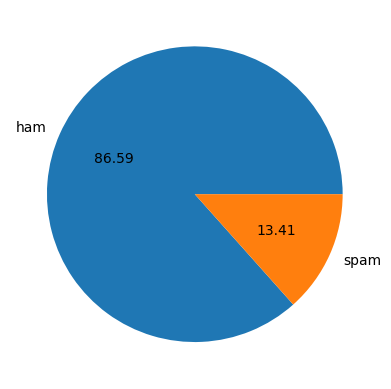

In [30]:
# see visualization od target columns for better undersanding o see any outlier availabe or not
import seaborn as sns
import matplotlib.pyplot as plt
# show with percentage values
plt.pie(df['target'].value_counts(),labels=['ham','spam'], autopct='%0.2f')
plt.show()

<Axes: xlabel='target', ylabel='count'>

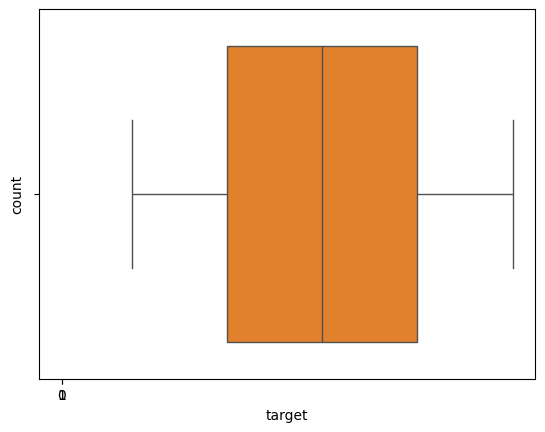

In [ ]:
sns.countplot(x='target', data=df)
# sns.boxplot(x=df['target'].value_counts().values)